---
# 3.1 Solving nonlinear equations
---

$$
a x^2 + b x + c = 0
$$

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

In many applications, one needs the solution to a **nonlinear equation** for which there is no closed formula.

- Suppose you do not have a cube-root function, but only the operations $+$, $-$, $\times$, $\div$:  

$$
x^3 = a
$$

- Polynomials with degree at least five have no general algebraic solution ([Abel-Ruffini Theorem](http://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem)): 

$$
x^5 - 5x^4 + 5x^3 + 5x^2 - 6x - 1 = 0
$$

- General nonlinear equations:

$$
10\cosh(x/4) = x
\qquad \text{and} \qquad
2\cosh(x/4) = x
$$

**Note:** The **hyperbolic sine**, **hyperbolic cosine**, and **hyperbolic tangent** functions are defined as

$$
\sinh(t) = \frac{e^t - e^{-t}}{2},
\qquad
\cosh(t) = \frac{e^t + e^{-t}}{2},
\qquad
\tanh(t) = \frac{e^t - e^{-t}}{e^t + e^{-t}}.
$$

Thus $\tanh(t) = \frac{\sinh(t)}{\cosh(t)}$, $\frac{d}{dt} \sinh(t) = \cosh(t)$, and $\frac{d}{dt} \cosh(t) = \sinh(t)$.

$$
\frac{d}{dt} \cos(t) = -\sin(t)
$$

---

## Problem statement

Given $f \in C[a,b]$ (i.e., a *continuous* function $f \colon [a,b] \to \mathbb{R}$) and we want to find $x^* \in [a, b]$ such that

$$
f(x^*) = 0.
$$

The solution $x^*$ is called a **root** or **zero** of the function $f$. There could be exactly one root, many roots, or no roots at all.

In [1]:
f(x) = 10cosh(x/4) - x

f (generic function with 1 method)

In [2]:
f(2.0)

9.276259652063807

In [3]:
# Plot the above functions and their roots

using Plots  # Package for plotting
using Roots  # Package for finding roots of functions
using LaTeXStrings

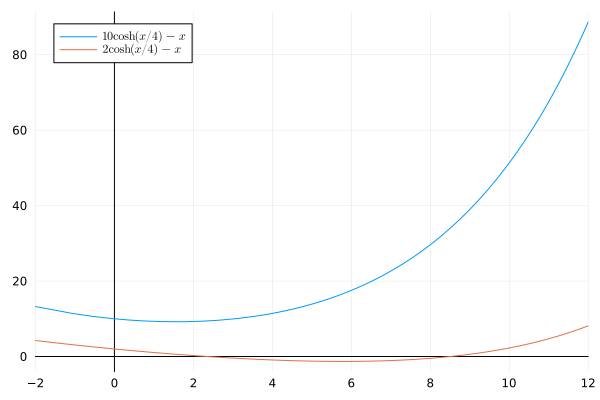

In [4]:
plot(axes_style=:zerolines, xlims=[-2,12])
plot!(x -> 10cosh(x/4) - x, label=L"10\cosh(x/4) - x")
plot!(x -> 2cosh(x/4) - x, label=L"2\cosh(x/4) - x")

In [5]:
f(x) = 2cosh(x/4) - x

f (generic function with 1 method)

In [6]:
f(2.5)

-0.0964926140487874

In [7]:
f(8.5)

-0.007669543606015239

In [8]:
rt1 = find_zero(f, (2,  4))

2.357551053877402

In [9]:
f(rt1)

0.0

In [10]:
rt2 = find_zero(f, (8,  10))

8.507199570713027

In [11]:
f(rt2)

1.7763568394002505e-15

In [12]:
rts = find_zeros(f, (0, 10))

2-element Vector{Float64}:
 2.357551053877402
 8.507199570713025

In [13]:
f.(rts)

2-element Vector{Float64}:
  0.0
 -1.7763568394002505e-15

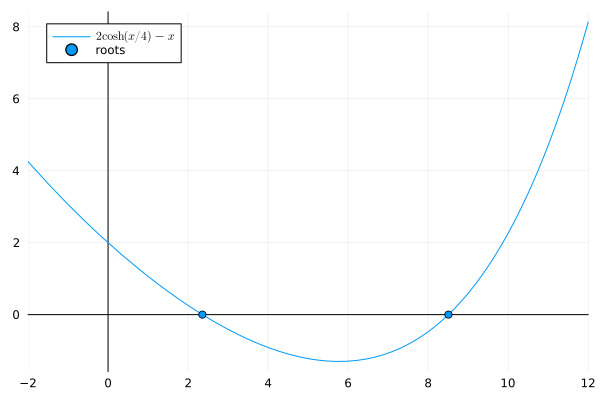

In [14]:
plot(axes_style=:zerolines, xlims=[-2,12])
plot!(x -> 2cosh(x/4) - x, label=L"2\cosh(x/4) - x")
scatter!(rts, f.(rts), label="roots", color=1)

---

## Iterative methods

Often there is no closed formula for a root $x^*$ of the function $f$. Instead of using a formula to compute a root $x^*$, we will start with an **initial guess** $x_0$ and generate a **sequence of iterates**

$$ x_1, x_2, x_3, \ldots, x_k, \ldots $$

that we hope **converges** to $x^*$; i.e.,

$$\lim_{k \to \infty} x_k = x^*.$$

**Note:** Different initial guesses $x_0$ may generate sequences of iterates that converge to different roots. We will see how to deal with this issue.

---

## When to stop

Since the sequence of iterates is infinite, we must decide when we are close enough to a root $x^*$. However, we do not know $x^*$, so how can we decide when we are close enough?

Some options are to stop when:

1. The function value is small:

  $$\left|f(x_k)\right| < \mathtt{ftol}.$$
  
  A problem with this test is that $\left|f(x_k)\right|$ may be very small although $x_k$ is still very far from a root.
    
2. Consecutive iterates are very close to each other:

   $$\left|x_k - x_{k-1}\right| < \mathtt{atol}.$$
   
   A problem with this test is that `atol` must take into account the magnitude of the iterates.

3. Consecutive iterates are *relatively* close to each other:

   $$\left|x_k - x_{k-1}\right| < \mathtt{rtol} \left|x_k\right|.$$
   
   Usually this is more robust than the above absolute test.
   
Often a combination of the above conditions is used. For example, items 2 and 3 can be combined:   

$$\left|x_k - x_{k-1}\right| < \mathtt{tol}(1 + \left|x_k\right|).$$

In [35]:
?find_zero

search: find_zero find_zeros



```
find_zero(f, x0, M, [N::AbstractBracketingMethod], p′=nothing; kwargs...)
```

Interface to one of several methods for finding zeros of a univariate function, e.g. solving $f(x)=0$.

# Arguments

## Positional arguments

  * `f`: the function (univariate or `f(x,p)` with `p` holding parameters)
  * `x0`: the initial condition (a value, initial values, or bracketing interval)
  * `M`: some `AbstractUnivariateZeroMethod` specifying the solver
  * `N`: some bracketing method, when specified creates a hybrid method

## Keyword arguments

  * `xatol`, `xrtol`: absolute and relatative tolerance to decide if `xₙ₊₁ ≈ xₙ`
  * `atol`, `rtol`: absolute and relatative tolerance to decide if `f(xₙ) ≈ 0`
  * `maxiters`: specify the maximum number of iterations the algorithm can take.
  * `verbose::Bool`: specifies if details about algorithm should be shown
  * `tracks`: allows specification of `Tracks` objecs

# Initial starting value

For most methods, `x0` is a scalar value indicating the initial value in the iterative procedure. (Secant methods can have a tuple specify their initial values.) Values must be a subtype of `Number` and have methods for `float`, `real`, and `oneunit` defined.

For bracketing intervals, `x0` is specified using a tuple, a vector, or any iterable with `extrema` defined. A bracketing interval, $[a,b]$, is one where $f(a)$ and $f(b)$ have different signs.

# Return value

If the algorithm suceeds, the approximate root identified is returned. A `ConvergenceFailed` error is thrown if the algorithm fails. The alternate form `solve(ZeroProblem(f,x0), M)` returns `NaN` in case of failure.

# Specifying a method

A method is specified to indicate which algorithm to employ:

  * There are methods where a bracket is specified: [`Bisection`](@ref), [`A42`](@ref), [`AlefeldPotraShi`](@ref), [`Roots.Brent`](@ref), among others. Bisection is the default for basic floating point types`, but`A42` generally requires far fewer iterations.
  * There are several derivative-free methods: cf. [`Order0`](@ref), [`Order1`](@ref) (also [`Roots.Secant`](@ref)), [`Order2`](@ref) (also [`Steffensen`](@ref)), [`Order5`](@ref), [`Order8`](@ref), and [`Order16`](@ref), where the number indicates the order of the convergence. Methods [`Roots.Order1B`](@ref) and [`Roots.Order2B`](@ref) are useful when the desired zero has a multiplicity.
  * There are some classical methods where derivatives are required: [`Roots.Newton`](@ref), [`Roots.Halley`](@ref), [`Roots.Schroder`](@ref), among others.
  * The family [`Roots.LithBoonkkampIJzerman{S,D}`](@ref) ,for different `S` and `D`, uses a linear multistep method root finder. The `(2,0)` method is the secant method, `(1,1)` is Newton's method.

For more detail, see the help page for each method (e.g., `?Order1`). Non-exported methods must be qualified with module name, as in `?Roots.Schroder`.

If no method is specified, the default method depends on `x0`:

  * If `x0` is a scalar, the default is the more robust `Order0` method.
  * If `x0` is a tuple, vector, or iterable with `extrema` defined indicating a *bracketing* interval, then the `Bisection` method is used for `Float64`, `Float32` or `Float16` types; otherwise the `A42` method is used.

The default methods are chosen to be robust; they may not be as efficient as some others.

# Specifying the function

The function(s) are passed as the first argument.

For the few methods that use one or more derivatives (`Newton`, `Halley`, `Schroder`, `LithBoonkkampIJzerman(S,D)`, etc.) a tuple of functions is used. For the classical algorithms, a function returning `(f(x), f(x)/f'(x), [f'(x)/f''(x)])` may be used.

# Optional arguments (tolerances, limit evaluations, tracing)

  * `xatol` - absolute tolerance for `x` values.
  * `xrtol` - relative tolerance for `x` values.
  * `atol`  - absolute tolerance for `f(x)` values.
  * `rtol`  - relative tolerance for `f(x)` values.
  * `maxiters`   - limit on maximum number of iterations.
  * `strict` - if `false` (the default), when the algorithm stops, possible zeros are checked with a relaxed tolerance.
  * `verbose` - if `true` a trace of the algorithm will be shown on successful completion. See the internal [`Tracks`](@ref) object to save this trace.

See the help string for `Roots.assess_convergence` for details on convergence. See the help page for `Roots.default_tolerances(method)` for details on the default tolerances.

In general, with floating point numbers, convergence must be understood as not an absolute statement. Even if mathematically `α` is an answer and `xstar` the floating point realization, it may be that `f(xstar) - f(α)  ≈ xstar ⋅  f'(α) ⋅ eps(α)`, so the role of tolerances must be appreciated, and at times specified.

For the `Bisection` methods, convergence is guaranteed over `Float64` values, so the tolerances are set to be $0$ by default.

If a bracketing method is passed in after the method specification, then whenever a bracket is identified during the algorithm, the method will switch to the bracketing method to identify the zero. (Bracketing methods are mathematically guaranteed to converge, non-bracketing methods may or may not converge.)  This is what `Order0` does by default, with an initial secant method switching to the `AlefeldPotraShi` method should a bracket be encountered.

Note: The order of the method is hinted at in the naming scheme. A scheme is order `r` if, with `eᵢ = xᵢ - α`, `eᵢ₊₁ = C⋅eᵢʳ`. If the error `eᵢ` is small enough, then essentially the error will gain `r` times as many leading zeros each step. However, if the error is not small, this will not be the case. Without good initial guesses, a high order method may still converge slowly, if at all. The `OrderN` methods have some heuristics employed to ensure a wider range for convergence at the cost of not faithfully implementing the method, though those are available through unexported methods.

# Examples:

Default methods.

```jldoctest find_zero
julia> using Roots

julia> find_zero(sin, 3)  # use Order0()
3.141592653589793

julia> find_zero(sin, (3,4)) # use Bisection()
3.141592653589793
```

Specifying a method,

```jldoctest find_zero
julia> find_zero(sin, (3,4), Order1())            # can specify two starting points for secant method
3.141592653589793

julia> find_zero(sin, 3.0, Order2())              # Use Steffensen method
3.1415926535897936

julia> find_zero(sin, big(3.0), Order16())        # rapid convergence
3.141592653589793238462643383279502884197169399375105820974944592307816406286198

julia> find_zero(sin, (3, 4), A42())              # fewer function calls than Bisection(), in this case
3.141592653589793

julia> find_zero(sin, (3, 4), FalsePosition(8))   # 1 of 12 possible algorithms for false position
3.141592653589793

julia> find_zero((sin,cos), 3.0, Roots.Newton())  # use Newton's method
3.141592653589793

julia> find_zero((sin, cos, x->-sin(x)), 3.0, Roots.Halley())  # use Halley's method
3.141592653589793
```

Changing tolerances.

```jldoctest find_zero
julia> fn = x -> (2x*cos(x) + x^2 - 3)^10/(x^2 + 1);

julia> x0, xstar = 3.0,  2.9947567209477;

julia> fn(find_zero(fn, x0, Order2())) <= 1e-14  # f(xₙ) ≈ 0, but Δxₙ can be largish
true

julia> find_zero(fn, x0, Order2(), atol=0.0, rtol=0.0) # error: x_n ≉ x_{n-1}; just f(x_n) ≈ 0
ERROR: Roots.ConvergenceFailed("Algorithm failed to converge")
[...]

julia> fn = x -> (sin(x)*cos(x) - x^3 + 1)^9;

julia> x0, xstar = 1.0,  1.112243913023029;

julia> isapprox(find_zero(fn, x0, Order2()), xstar; atol=1e-4)
true

julia> find_zero(fn, x0, Order2(), maxiters=3)    # need more steps to converge
ERROR: Roots.ConvergenceFailed("Algorithm failed to converge")
[...]
```

# Tracing

Passing `verbose=true` will show details on the steps of the algorithm. The `tracks` argument allows the passing of a [`Tracks`](ref) object to record the values of `x` and `f(x)` used in the algorithm.

!!! note
    See [`solve!`](@ref) and [`ZeroProblem`](@ref) for an alternate interface.



In [2]:
using Roots

f(x) = 2cosh(x/4) - x

f (generic function with 1 method)

In [10]:
rt1 = find_zero(f, [8, 10], xatol=0.0, xrtol=0.0, atol=0.0, rtol=0.0, maxiters=10000)

f(rt1)

1.7763568394002505e-15

In [11]:
rt1

8.507199570713027

In [12]:
@which find_zero(f, [8, 10])

find_zero(f, x0; kwargs...) in Roots at /Users/krislock/.julia/packages/Roots/Ez3Om/src/find_zero.jl:239

---